# Lendingkart

Lendingkart simplifies MSME finance. The main products of the company include - 
1. Business loan
2. Working capital loan
3. MSME loan
4. Business loan for women

In [78]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/lendingkart/lendingkart.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(5490, 27)

## Preprocessing

In [79]:
processor = Processor('./../../data/config.json')

In [4]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [5]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [6]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [7]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [8]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.020*"lendingkart" + 0.011*"india" + 0.009*"smooth_finance" + '
  '0.008*"documents" + 0.008*"heres" + 0.007*"help" + 0.007*"check" + '
  '0.006*"resource_msme" + 0.006*"platforms_provides" + '
  '0.006*"capital_techcrunch"'),
 (1,
  '0.063*"indias_lendingkart" + 0.063*"access_working" + '
  '0.060*"small_businesses" + 0.059*"raises_help" + 0.059*"capital" + '
  '0.011*"lendingkart" + 0.007*"helping" + 0.007*"loan" + 0.005*"team" + '
  '0.005*"thank"'),
 (2,
  '0.038*"thank" + 0.022*"hello" + 0.018*"business" + 0.017*"contact_details" '
  '+ 0.016*"loan" + 0.014*"dear_customer" + 0.010*"carecom" + '
  '0.009*"regret_inconvenience" + 0.009*"representatives_contact" + '
  '0.009*"share_registered"'),
 (3,
  '0.043*"lendingkart" + 0.011*"business" + 0.009*"hackathon" + '
  '0.009*"register" + 0.008*"team" + 0.008*"know" + 0.007*"number" + '
  '0.007*"days" + 0.007*"event" + 0.006*"dont"'),
 (4,
  '0.018*"loan" + 0.010*"lendingkart" + 0.009*"lendingkart_raises" + '
  '0.008*"busin

In [9]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [10]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.057*"details" + 0.037*"contact" + 0.030*"hello" + 0.028*"concern" + '
  '0.027*"kindly_dm" + 0.027*"contact_solve" + 0.027*"concern_looking" + '
  '0.026*"forward_serve" + 0.025*"shall_happy" + 0.025*"experience_officer"'),
 (1,
  '0.025*"lendingkart" + 0.012*"rs_crore" + 0.010*"thanks_kind" + '
  '0.010*"patience_cooperation" + 0.010*"business" + 0.009*"financial" + '
  '0.009*"sir" + 0.009*"loan" + 0.008*"approved" + 0.008*"order"'),
 (2,
  '0.045*"deeply_value" + 0.044*"association_reassure" + '
  '0.043*"committed_serving" + 0.043*"team_fully" + 0.026*"dear_sir" + '
  '0.024*"better" + 0.020*"better_thank" + 0.017*"conversation_representative" '
  '+ 0.017*"hope_satisfied" + 0.017*"connect_soon"'),
 (3,
  '0.022*"lendingkart" + 0.012*"company" + 0.011*"deducted" + 0.011*"help" + '
  '0.010*"emi" + 0.008*"time" + 0.008*"mail" + 0.007*"like" + 0.007*"raised" + '
  '0.007*"sir"'),
 (4,
  '0.018*"loan" + 0.010*"customer_care" + 0.008*"company" + 0.008*"bank" + '
  '0.007*"ur"

### Evaluation

In [11]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -12.041326886953787


In [12]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -8.807710960349542


## Hyper-parameter tuning

### Pre-COVID

In [13]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/lendingkart/pre.csv")

100%|██████████| 780/780 [3:45:28<00:00, 17.34s/it]    


In [16]:
# pre_df_result = pd.read_csv("./../../data/fintech/lendingkart/pre.csv")

In [17]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
648,100% Corpus,10,0.9099999999999999,0.9099999999999999,-8.503835
438,100% Corpus,3,0.9099999999999999,0.9099999999999999,-8.570930
428,100% Corpus,3,0.31,0.9099999999999999,-8.860387
437,100% Corpus,3,0.9099999999999999,0.61,-8.903289
443,100% Corpus,3,symmetric,0.9099999999999999,-8.948995
432,100% Corpus,3,0.61,0.61,-8.987103
435,100% Corpus,3,0.9099999999999999,0.01,-9.103997
442,100% Corpus,3,symmetric,0.61,-9.117170
58,75.0% Corpus,3,asymmetric,0.9099999999999999,-9.132598
469,100% Corpus,4,0.9099999999999999,symmetric,-9.161936


In [47]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.9099999999999999',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

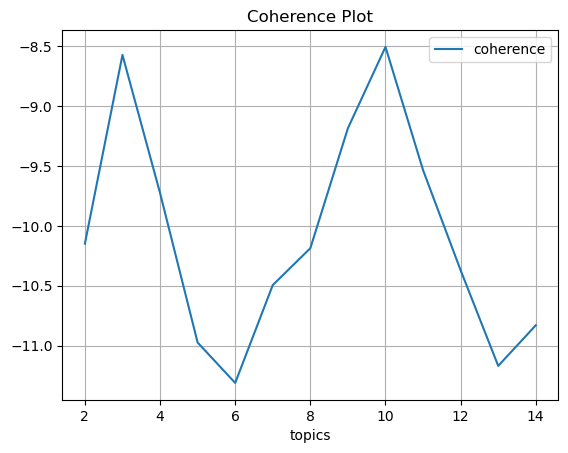

In [94]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [70]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

For pre-COVID period, there are two points 10 and 3 where are coherence score is close to 0. But for the initial analysis, 3 will be chosen.

In [49]:
pre_df_result[pre_df_result['Topics'] == 3].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
438,100% Corpus,3,0.9099999999999999,0.9099999999999999,-8.570930
428,100% Corpus,3,0.31,0.9099999999999999,-8.860387
437,100% Corpus,3,0.9099999999999999,0.61,-8.903289
443,100% Corpus,3,symmetric,0.9099999999999999,-8.948995
432,100% Corpus,3,0.61,0.61,-8.987103


### Post-COVID

In [24]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/lendingkart/post.csv")

100%|██████████| 780/780 [41:37<00:00,  3.20s/it]


In [26]:
# post_df_result = pd.read_csv("./../../data/fintech/lendingkart/post.csv")

In [27]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
412,100% Corpus,2,symmetric,0.61,-4.037596
398,100% Corpus,2,0.31,0.9099999999999999,-4.082007
402,100% Corpus,2,0.61,0.61,-4.146275
417,100% Corpus,2,asymmetric,0.61,-4.154252
407,100% Corpus,2,0.9099999999999999,0.61,-4.155749
403,100% Corpus,2,0.61,0.9099999999999999,-4.195067
415,100% Corpus,2,asymmetric,0.01,-4.211162
404,100% Corpus,2,0.61,symmetric,-4.211570
393,100% Corpus,2,0.01,0.9099999999999999,-4.241058
406,100% Corpus,2,0.9099999999999999,0.31,-4.348645


In [50]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        'symmetric',
                                        '0.61')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

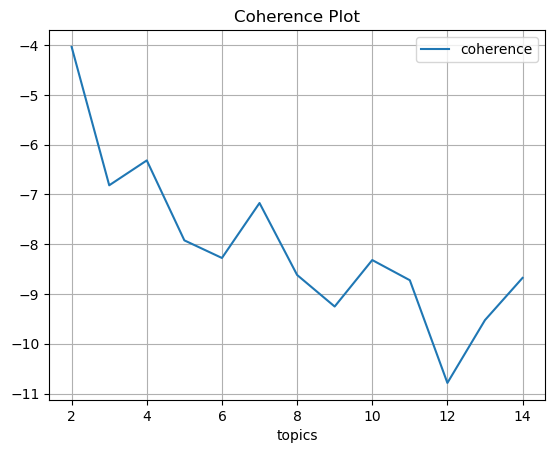

In [93]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [71]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

For the post-COVID period, the model with a number of topics equal to 2 gives the best coherence score.

In [52]:
post_df_result[(post_df_result['Topics'] == 2)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
412,100% Corpus,2,symmetric,0.61,-4.037596
398,100% Corpus,2,0.31,0.9099999999999999,-4.082007
402,100% Corpus,2,0.61,0.61,-4.146275
417,100% Corpus,2,asymmetric,0.61,-4.154252
407,100% Corpus,2,0.9099999999999999,0.61,-4.155749


## Final Models

### Pre-COVID

In [53]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=3,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.91,
                                        eta=0.91)

In [54]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -8.483039795321636


### Post-COVID

In [55]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='symmetric',
                                        eta=0.61)

In [56]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -4.691645589813399


## Inferencing

### Pre-COVID

In [62]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist())

In [63]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.8362,"indias_lendingkart, small_businesses, access_w...","[hello, seemant, regret_inconvenience, caused_..."
1,0,0.5690,"indias_lendingkart, small_businesses, access_w...","[sir, got, message, request, consider, issuing..."
2,1,0.6858,"lendingkart, alteria_capital, capital, india, ...","[profitable, indian, sme, cr, turnover, good, ..."
3,2,0.8153,"lendingkart, loan, business, heres, team, comp...","[mobile_number, mail, jawedqamar, com, jj, ent..."
4,2,0.8705,"lendingkart, loan, business, heres, team, comp...","[lendingkart, appointed, ratul, paul, senior, ..."
...,...,...,...,...
1268,0,0.8606,"indias_lendingkart, small_businesses, access_w...","[hi, avinash, hope_representative, answered_qu..."
1269,1,0.8033,"lendingkart, alteria_capital, capital, india, ...","[oncampus, placement, drive, lendingkart, nara..."
1270,0,0.8525,"indias_lendingkart, small_businesses, access_w...","[hi, avinash, regret_inconvenience, caused, sh..."
1271,1,0.6430,"lendingkart, alteria_capital, capital, india, ...","[wish, let, guys, know, running, scam, horribl..."


In [64]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['indias_lendingkart, small_businesses, access_working, raises_help, capital, thank, hello, contact_details, experience, request',
       'lendingkart, alteria_capital, capital, india, startup, raised, rs_crore, lendingkart_raises, lending, million',
       'lendingkart, loan, business, heres, team, company, help, india, growth, new'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Enabling business
   - Key terms: 'indias_lendingkart, small_businesses, access_working, raises_help, capital, thank, hello, contact_details, experience, request'

2. Topic Number: 1
   - Probable topic title: Fundraising
   - Key terms: 'lendingkart, alteria_capital, capital, india, startup, raised, rs_crore, lendingkart_raises, lending, million'

3. Topic Number: 2
   - Probable topic title: Social Identity
   - Key terms: 'lendingkart, loan, business, heres, team, company, help, India, growth, new'

In [95]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

[Text(0, 0, '445'), Text(0, 0, '419'), Text(0, 0, '409')]

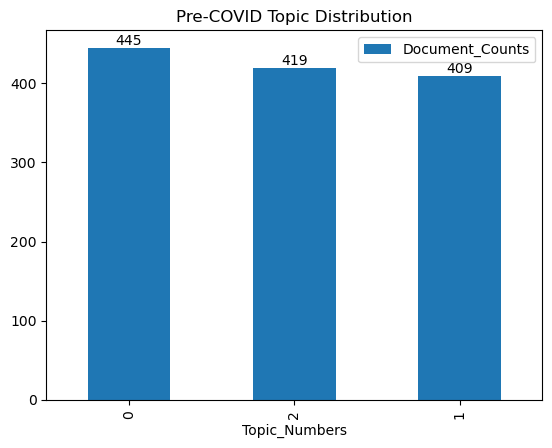

In [103]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

All the topics have almost equal distribution. This can be one of the signals that the company is conscious of its social media presence.

### Post-COVID

In [81]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist()
)

In [82]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1,0.9781,"lendingkart, emi, loan, moratorium, time, comp...","[loan_id, lai, reverse, covid, releaf, govt, e..."
1,1,0.9781,"lendingkart, emi, loan, moratorium, time, comp...","[loan_id, lai, reverse, covid, releaf, govt, e..."
2,1,0.9484,"lendingkart, emi, loan, moratorium, time, comp...","[recvd, thing, end, kindly, let_know, getting,..."
3,1,0.8493,"lendingkart, emi, loan, moratorium, time, comp...","[dear, asking, restructuring, forcing, settle,..."
4,0,0.9610,"customer_experience, contact, serve, kindly_dm...","[hello, kindly_dm, share_registered, contact, ..."
...,...,...,...,...
3507,1,0.9717,"lendingkart, emi, loan, moratorium, time, comp...","[function, efficiently, critical, team, page, ..."
3508,1,0.9745,"lendingkart, emi, loan, moratorium, time, comp...","[speaker, alert, join, mithun_sundar, ceo, mit..."
3509,1,0.9723,"lendingkart, emi, loan, moratorium, time, comp...","[union, earmarked, rs_crore, ministry, announc..."
3510,1,0.9851,"lendingkart, emi, loan, moratorium, time, comp...","[help, mai, se, loan, apply, kiya, approval, h..."


In [83]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['lendingkart, emi, loan, moratorium, time, company, mail, reply, request, dont',
       'customer_experience, contact, serve, kindly_dm, share_registered, officer_shall, looking_forward, solve_concern, happy_contact, value_association'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Loan Processing Issues and Queries
   - Key terms: 'indias_lendingkart, small_businesses, access_working, raises_help, capital, thank, hello, contact_details, experience, request'

2. Topic Number: 1
   - Probable topic title: Issue resolutions by company
   - Key terms: 'customer_experience, contact, serve, kindly_dm, share_registered, officer_shall, looking_forward, solve_concern, happy_contact, value_association'

In [99]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

[Text(0, 0, '1871'), Text(0, 0, '1641')]

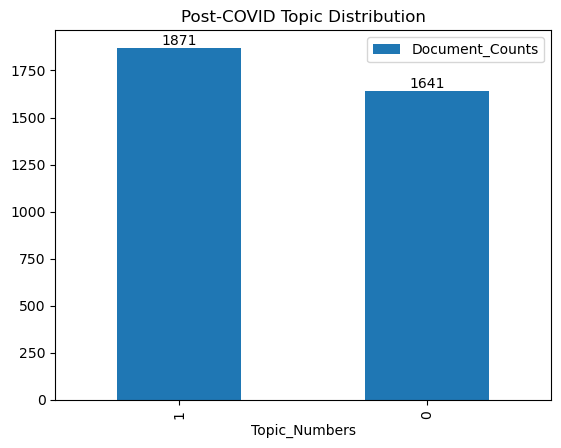

In [101]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

The distribution is topics is still uniform.
